ASSIGNMENT -5

DONE BY ABDUL AZIZ (21BCE8621)

Market Basket Magic: Extracting Insights for
Retail Success
Customer segmentation is a crucial aspect of retail and marketing strategy. Mall
Customer Segmentation is a common data analysis project that involves categorizing
mall customers into distinct groups or segments based on various characteristics and
behaviors. This segmentation is valuable for tailoring marketing efforts, optimizing
store layouts, and enhancing customer experiences

Task:

Understand the data

Data Preprocessing

Machine Learning approach with clustering algorithm



In [ ]:
#Exporting the reqired libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#LOAD THE DATASET
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#DATA PREPROCESSING

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().any() # found no missing values in dataset

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
df.isnull().sum() # checks the missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df['CustomerID'].nunique()

200

In [ ]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your features and 'y' contains your target variable
X = df.drop('Gender', axis=1)
y = df['Annual Income (k$)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model (for classification)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')


Accuracy: 57.49999999999999


#K-VALUE-IN - Kmeans

In [21]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


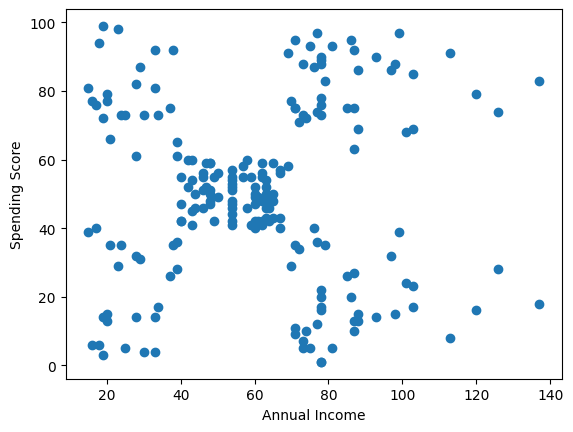

In [23]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [26]:
from sklearn.preprocessing import normalize
df_scaled=normalize(df)

In [28]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.413925,0.326783,0.849635
1,0.000000,0.247025,0.176446,0.952809
2,0.037987,0.759737,0.607790,0.227921
3,0.012203,0.280676,0.195253,0.939653
4,0.018728,0.580581,0.318383,0.749137


In [30]:
from sklearn.cluster import KMeans
k_mean=KMeans(n_clusters=2)
k_mean.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
identified_clusters=k_mean.fit_predict(df_scaled)
df['Cluster_int']=identified_clusters

In [32]:
k_mean.inertia_

15.236147767255536

In [33]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_int
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,1


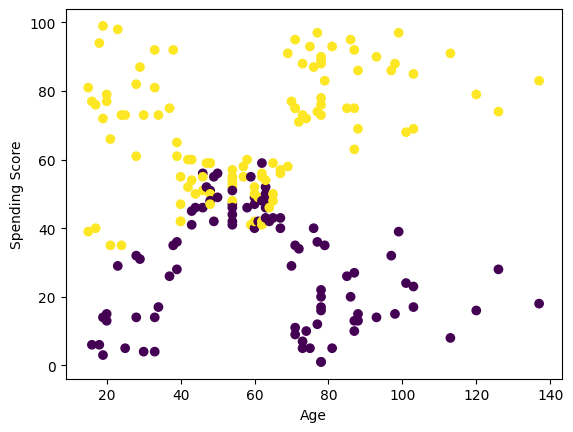

In [34]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Cluster_int'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#Changing the value of k

In [38]:
from sklearn.cluster import KMeans
k_mean=KMeans(n_clusters=5)
k_mean.fit(df_scaled)
identified_clusters=k_mean.fit_predict(df_scaled)
df['Cluster_int_1']=identified_clusters
k_mean.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.7163470579590068

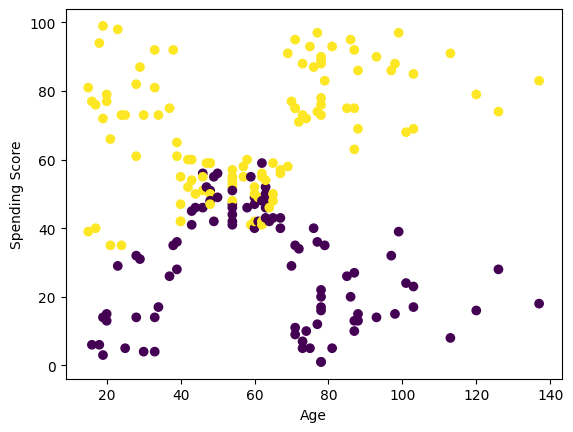

In [39]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Cluster_int'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
wss=[]
for i in range(1,10):
  from sklearn.cluster import KMeans
  k_mean=KMeans(n_clusters=i)
  k_mean.fit(df_scaled)
  wss.append(k_mean.inertia_)

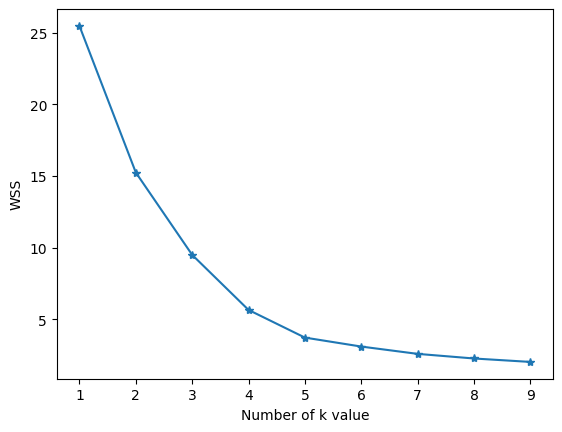

In [42]:
plt.plot([1,2,3,4,5,6,7,8,9],wss,marker='*')
plt.xlabel("Number of k value")
plt.ylabel("WSS")
plt.show()